In [1]:
import xgboost
import shap
import shap.maskers as maskers

In [2]:
# get a dataset on income prediction
X, y = shap.datasets.adult()

# train an XGBoost model (but any other model type would also work)
model = xgboost.XGBClassifier()
model.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [3]:
clustering = shap.utils.hclust(X, y)

In [4]:
# build a clustering of the features based on shared information about y
clustering = shap.utils.hclust(X, y)

# above we implicitly used shap.maskers.Independent by passing a raw dataframe as the masker
# now we explicitly use a Partition masker that uses the clustering we just computed
masker = maskers.Partition(X, clustering=clustering)

In [5]:
masker.invariants(X.values[0, :]).shape

(100, 12)

In [6]:
import numpy as np
clustering_label = np.repeat(np.array([0, 1, 2]), 4)


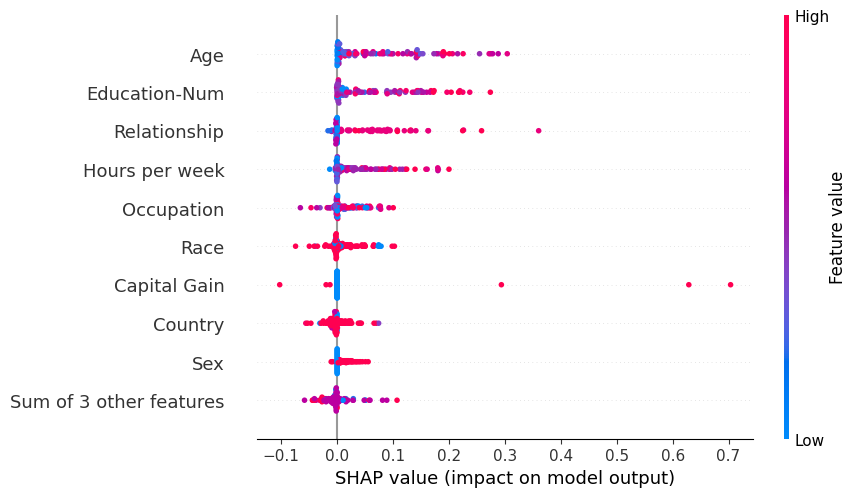

In [10]:
# A masking function takes a binary mask vector as the first argument and
# the model arguments for a single sample after that
# It returns a masked version of the input x, where you can return multiple
# rows to average over a distribution of masking types
def custom_masker(mask, x):
    # in this simple example we just zero out the features we are masking
    return (x * mask).reshape(1, len(x))


# compute SHAP values
explainer = shap.PermutationExplainer(model.predict_proba, custom_masker)
shap_values = explainer(X[:100])

# plot the SHAP values for the positive class
shap.plots.beeswarm(shap_values[..., 1])

In [48]:
shap.utils.partition_tree(X)

array([[ 5.        ,  7.        ,  0.67383441,  2.        ],
       [ 1.        ,  4.        ,  0.74510818,  2.        ],
       [ 2.        , 10.        ,  0.85187727,  2.        ],
       [ 6.        , 11.        ,  0.86214811,  2.        ],
       [ 0.        , 12.        ,  0.91116827,  3.        ],
       [ 8.        , 14.        ,  0.92159138,  3.        ],
       [ 9.        , 16.        ,  0.95443265,  4.        ],
       [13.        , 17.        ,  0.97449547,  5.        ],
       [15.        , 18.        ,  1.00811872,  6.        ],
       [19.        , 20.        ,  1.03161506, 11.        ],
       [ 3.        , 21.        ,  1.26628802, 12.        ]])